Gravity Brightening/Darkening (gravb_bol)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In [3]:
b.add_dataset('lc', dataset='lc01')
b.add_dataset('mesh', times=[0], columns=['intensities*'])

Wed, 11 Dec 2019 13:23 BUNDLE       WARNING mesh dataset uses 'compute_times' instead of 'times', applying value sent as 'times' to 'compute_times'.


<ParameterSet: 8 parameters | contexts: dataset, compute, constraint>

Relevant Parameters
--------------------

The 'gravb_bol' parameter corresponds to the &beta; coefficient for gravity darkening corrections.

In [4]:
print(b['gravb_bol'])

ParameterSet: 2 parameters
     gravb_bol@primary@component: 0.32
   gravb_bol@secondary@component: 0.32


In [5]:
print(b['gravb_bol@primary'])

Parameter: gravb_bol@primary@component
                       Qualifier: gravb_bol
                     Description: Bolometric gravity brightening
                           Value: 0.32
                  Constrained by: 
                      Constrains: None
                      Related to: None



If you have a logger enabled, PHOEBE will print a warning if the value of gravb_bol is outside the "suggested" ranges.  Note that this is strictly a warning, and will never turn into an error at [b.run_compute()](../api/phoebe.frontend.bundle.Bundle.run_compute.md).

You can also manually call [b.run_checks()](../api/phoebe.frontend.bundle.Bundle.run_checks.md).  The first returned item tells whether the system has passed checks: True means it has, False means it has failed, and None means the tests pass but with a warning.  The second argument tells the first warning/error message raised by the checks.

The checks use the following "suggested" values:
 * teff 8000+: gravb_bol >= 0.9 (suggest 1.0)
 * teff 6600-8000: gravb_bol 0.32-1.0
 * teff 6600-: grav_bol < 0.9 (suggest 0.32)

In [6]:
print(b.run_checks())

Run Checks Report: PASS



In [7]:
b['teff@primary'] = 8500
b['gravb_bol@primary'] = 0.8
print(b.run_checks())

Wed, 11 Dec 2019 13:23 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8500K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Wed, 11 Dec 2019 13:23 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8500K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.
Wed, 11 Dec 2019 13:23 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8500K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.80.
Wed, 11 Dec 2019 13:23 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8500K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.


Run Checks Report: WARNING


In [8]:
b['teff@primary'] = 7000
b['gravb_bol@primary'] = 0.2
print(b.run_checks())

Wed, 11 Dec 2019 13:23 BUNDLE       WARNING 'primary' has intermittent temperature (6600K<teff=7000K<8000K), gravb_bol might be better between 0.32-1.00 than gravb_bol=0.20.


Run Checks Report: WARNING


In [9]:
b['teff@primary'] = 6000
b['gravb_bol@primary'] = 1.0
print(b.run_checks())

Wed, 11 Dec 2019 13:23 BUNDLE       WARNING 'primary' probably has a convective atm (teff=6000K<6600K), for which gravb_bol<0.9 (suggestion: 0.32) might be a better approx than gravb_bol=1.00.


Run Checks Report: WARNING


Influence on Intensities
------------------

In [10]:
b['teff@primary'] = 6000
b['gravb_bol@primary'] = 0.32

Wed, 11 Dec 2019 13:23 BUNDLE       WARNING 'primary' probably has a convective atm (teff=6000K<6600K), for which gravb_bol<0.9 (suggestion: 0.32) might be a better approx than gravb_bol=1.00.


In [11]:
b.run_compute(model='gravb_bol_32')

<ParameterSet: 14 parameters | contexts: model, figure>

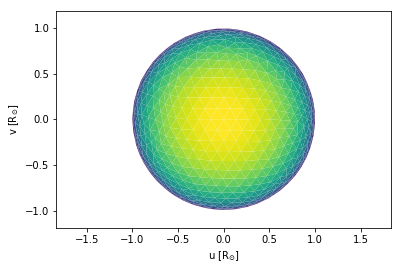

In [12]:
afig, mplfig = b['primary@mesh01@gravb_bol_32'].plot(fc='intensities', ec='None', show=True)

In [13]:
b['gravb_bol@primary'] = 1.0

Wed, 11 Dec 2019 13:23 BUNDLE       WARNING 'primary' probably has a convective atm (teff=6000K<6600K), for which gravb_bol<0.9 (suggestion: 0.32) might be a better approx than gravb_bol=1.00.


In [14]:
b.run_compute(model='gravb_bol_10')

Wed, 11 Dec 2019 13:23 BUNDLE       WARNING 'primary' probably has a convective atm (teff=6000K<6600K), for which gravb_bol<0.9 (suggestion: 0.32) might be a better approx than gravb_bol=1.00.


<ParameterSet: 14 parameters | contexts: model, figure>

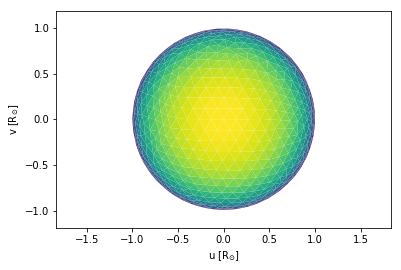

In [15]:
afig, mplfig = b['primary@mesh01@gravb_bol_10'].plot(fc='intensities', ec='None', show=True)

Comparing these two plots, it is essentially impossible to notice any difference between the two models.  But if we compare the intensities directly, we can see that there is a subtle difference, with a maximum difference of about 3%.

In [16]:
np.nanmax((b.get_value('intensities', component='primary', model='gravb_bol_32') - b.get_value('intensities', component='primary', model='gravb_bol_10'))/b.get_value('intensities', component='primary', model='gravb_bol_10'))

0.03216642556279494